<a href="https://colab.research.google.com/github/drdww/OPIM5641/blob/main/Module3/M3_1/Allocation_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Programming: Allocation Models
**OPIM 5641: Business Decision Modeling - Dept. of Operations and Information Management - University of Connecticut**

--------------------------------------

Related Readings:
* `Pyomo Cookbook`: https://github.com/jckantor/ND-Pyomo-Cookbook/blob/master/notebooks/02.01-Production-Models-with-Linear-Constraints.ipynb
* `Powell`: Chapter 9 (Linear Optimization)

## Background
The allocation model calls for maximizing an objective(usually proﬁt) subject to less-than constraints on capacity.

## Setup Your Environment/Imports

In [ ]:
# import modules

%matplotlib inline
from pylab import *

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc 
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))

from pyomo.environ import *

     |████████████████████████████████| 9.5MB 4.1MB/s 
     |████████████████████████████████| 51kB 3.5MB/s 
     |████████████████████████████████| 256kB 44.2MB/s 
     |████████████████████████████████| 163kB 34.7MB/s 
Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 160983 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking coi

# Example: Furniture
*Section 9.2 (Powell) - Chairs, Desks and Tables*

**Problem Description:**
Veerman Furniture Company makes three kinds of ofﬁce furniture: chairs, desks, and tables. Each product requires some labor in the parts fabrication department, the assembly department, and the shipping department. The furniture is sold through a regional distributor, who has estimated the maximum potential sales for each product in the coming quarter. Finally,the accounting department has provided some data showing the proﬁt contributions on each product.The decision problem isto determine the product mix—that is, to maximize Veerman’s proﬁt for the quarter by choosing production quantities for the chairs,desks,and tables.

The following data summarizes the parameters of the problem:

Department | Chairs | Desks | Tables | Hours Available
--- | --- | --- | --- | ---
Fabrication | 4 | 6 | 2 | 1,850
Assembly | 3 | 5 | 7 | 2,400
Shipping | 3 | 2 | 4 | 1,500
--------------------------------------------------------------------------------
Demand Potential | 360 | 300 | 100 |
Profit (USD) | 15 | 24 | 18 |

**Define the Objective Function**

$Profit = 15C + 24D + 18T$

**Write the Constraints**

$Max(Z) = 15C + 24D + 18T$

subject to:
* $4C + 6D + 2T <= 1,850$
* $3C + 5D + 7T <= 2,400$
* $3C + 2D + 4T <= 1,500$ 
* $C        <= 360$ 
* $D      <=300$ 
* $T <=10$

Great! Now that your problem is defined - go code it up and solve it.

In [ ]:
# declare the model
model = ConcreteModel()

# declare decision variables
model.c = Var(domain=NonNegativeReals) # c for chairs
model.d = Var(domain=NonNegativeReals) # d for desks
model.t = Var(domain=NonNegativeReals) # t for tables

# declare objective
model.profit = Objective(
                      expr = 15*model.c + 24*model.d + 18*model.t, # values come from the table
                      sense = maximize)

# declare constraints
model.Constraint1 = Constraint(expr = 4*model.c + 6*model.d + 2*model.t <= 1850) # fabrication hours
model.Constraint2 = Constraint(expr = 3*model.c + 5*model.d + 7*model.t <= 2400) # assembly hours
model.Constraint3 = Constraint(expr = 3*model.c + 2*model.d + 4*model.t <= 1500) # shipping
model.Constraint4 = Constraint(expr = model.c <= 360) # c demand
model.Constraint5 = Constraint(expr = model.d <= 300) # d demand
model.Constraint6 = Constraint(expr = model.t <= 100) # t demand

In [ ]:
# show the model you've created
model.pprint()

3 Var Declarations
    c : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    d : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals
    t : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :     0 :  None :  None : False :  True : NonNegativeReals

1 Objective Declarations
    profit : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : maximize : 15*c + 24*d + 18*t

6 Constraint Declarations
    Constraint1 : Size=1, Index=None, Active=True
        Key  : Lower : Body            : Upper  : Active
        None :  -Inf : 4*c + 6*d + 2*t : 1850.0 :   True
    Constraint2 : Size=1, Index=None, Active=True
        Key  : Lower : Body            : Upper  : Active
        None :  -Inf : 3*c + 

In [ ]:
# ensure you have cbc installed
# !apt-get install -y -qq coinor-cbc

In [ ]:
# solve it
SolverFactory('cbc', executable='/usr/bin/cbc').solve(model).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 8400.0
  Upper bound: 8400.0
  Number of objectives: 1
  Number of constraints: 7
  Number of variables: 4
  Number of nonzeros: 3
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created s

In [ ]:
# show the results
print("Profit = ", model.profit(), " per week")
print("Chairs = ", model.c(), " units per week")
print("Desks = ", model.d(), " units per week")
print("Tables = ", model.t(), " units per week")

Profit =  8400.0  per week
Chairs =  0.0  units per week
Desks =  275.0  units per week
Tables =  100.0  units per week


# Binding Constraints
Let's see if any constraints are 'binding' (you use it all up!)

A binding constraint is where the LHS is equal to the RHS.

$Max(Z) = 15C + 24D + 18T$

subject to:
* $4C + 6D + 2T <= 1,850$ `[fabrication]`
* $3C + 5D + 7T <= 2,400$ `[assembly]`
* $3C + 2D + 4T <= 1,500$ `[shipping]` 
* $C        <= 360$ `[chair demand]`
* $D      <=300$  `[desk demand]`
* $T <=10$ `[table demand]`

In [ ]:
print("Fabrication = ", model.Constraint1(), "hours")
print("Assembly = ", model.Constraint2(), "hours")
print("Shipping = ", model.Constraint3(), "hours")
print("Chairs = ", model.Constraint4(), " units per week")
print("Desks = ", model.Constraint5(), " units per week")
print("Tables = ", model.Constraint6(), " units per week")

Fabrication =  1850.0 hours
Assembly =  2075.0 hours
Shipping =  950.0 hours
Chairs =  0.0  units per week
Desks =  275.0  units per week
Tables =  100.0  units per week


# For Loop for 'Shadow Prices'
Linear programs typically give rise to a distinct pattern in sensitivity tables when we vary the availability of a scarce resource.The marginal value of capacity remains constant over some interval of increase or decrease. Within this interval, some of the decision variables change linearly with the change in capacity, while other decision variables stay the same.If someone were to continually give us more of a scarce resource,its value would drop and eventually fall to zero. In the case of our product mix problem,we could conﬁrm that the value of additional hours drops to zero at a capacity level of 3,000. 

Let's check it out!


In [ ]:
myHours = np.arange(1500,5000,100)
print(myHours)

[1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800
 2900 3000 3100 3200 3300 3400 3500 3600 3700 3800 3900 4000 4100 4200
 4300 4400 4500 4600 4700 4800 4900]


In [ ]:
# store the results
import pandas as pd
myResults = pd.DataFrame() # empty place to store results

for a in myHours:
  # declare the model
  model = ConcreteModel()

  # declare decision variables
  model.c = Var(domain=NonNegativeReals)
  model.d = Var(domain=NonNegativeReals)
  model.t = Var(domain=NonNegativeReals)

  # declare objective
  model.profit = Objective(
                        expr = 15*model.c + 24*model.d + 18*model.t, # values come from the table
                        sense = maximize)

  # declare constraints
  model.Constraint1 = Constraint(expr = 4*model.c + 6*model.d + 2*model.t <= a) # fabrication hours
  model.Constraint2 = Constraint(expr = 3*model.c + 5*model.d + 7*model.t <= 2400) # assembly hours
  model.Constraint3 = Constraint(expr = 3*model.c + 2*model.d + 4*model.t <= 1500) # shipping
  model.Constraint4 = Constraint(expr = model.c <= 360) # c demand
  model.Constraint5 = Constraint(expr = model.d <= 300) # d demand
  model.Constraint6 = Constraint(expr = model.t <= 100) # t demand

  # solve it
  SolverFactory('cbc', executable='/usr/bin/cbc').solve(model).write()

  # results
 
  myX = pd.DataFrame([a, model.profit(), model.c(), model.d(), model.t()])
  myX=myX.T # transpose

  # store the profit
  myResults = myResults.append(myX)
 
# Change the Column names
myResults = myResults.rename( {0:"Fabrication Hours", 1:"Profit",2:"Chairs", 3:"Desks" ,4:"Tables"}, axis='columns') 
myResults.reset_index(drop=True, inplace=True)
print(myResults)

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 7000.0
  Upper bound: 7000.0
  Number of objectives: 1
  Number of constraints: 7
  Number of variables: 4
  Number of nonzeros: 3
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created s

## Product Mix
Let's see how the product mix would change if we were able to increase the fabrication hours in increments of 100 hours. 

In [ ]:
myResults

,Fabrication Hours,Profit,Chairs,Desks,Tables
0,1500.0,7000.000080,0.000000,216.66667,100.000000
1,1600.0,7399.999920,0.000000,233.33333,100.000000
2,1700.0,7800.000000,0.000000,250.00000,100.000000
3,1800.0,8200.000080,0.000000,266.66667,100.000000
4,1900.0,8599.999920,0.000000,283.33333,100.000000
5,2000.0,9000.000000,0.000000,300.00000,100.000000
6,2100.0,9375.000000,25.000000,300.00000,100.000000
7,2200.0,9750.000000,50.000000,300.00000,100.000000
8,2300.0,10077.272715,77.272727,300.00000,95.454545
9,2400.0,10309.090926,109.090910,300.00000,81.818182


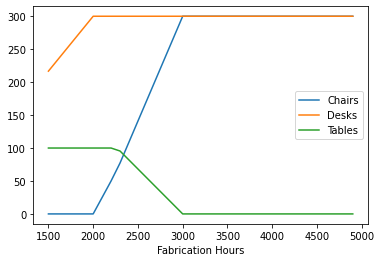

In [ ]:
# make a nice plot
tmp = myResults.drop(['Profit'], axis=1)
tmp.plot(x='Fabrication Hours')

In [ ]:
# add a column for marginal increase (per 100 hours)
myResults['ProfitDiff'] = myResults['Profit'].diff()

# if you wanted it by ONE HOUR
myResults['ProfitDiffOneHour'] = myResults['Profit'].diff()/myResults['Fabrication Hours'].diff()

# show the table
myResults

,Fabrication Hours,Profit,Chairs,Desks,Tables,ProfitDiff,ProfitDiffOneHour
0,1500.0,7000.000080,0.000000,216.66667,100.000000,NaN,NaN
1,1600.0,7399.999920,0.000000,233.33333,100.000000,399.999840,3.999998
2,1700.0,7800.000000,0.000000,250.00000,100.000000,400.000080,4.000001
3,1800.0,8200.000080,0.000000,266.66667,100.000000,400.000080,4.000001
4,1900.0,8599.999920,0.000000,283.33333,100.000000,399.999840,3.999998
5,2000.0,9000.000000,0.000000,300.00000,100.000000,400.000080,4.000001
6,2100.0,9375.000000,25.000000,300.00000,100.000000,375.000000,3.750000
7,2200.0,9750.000000,50.000000,300.00000,100.000000,375.000000,3.750000
8,2300.0,10077.272715,77.272727,300.00000,95.454545,327.272715,3.272727
9,2400.0,10309.090926,109.090910,300.00000,81.818182,231.818211,2.318182


## Profit and Diminishing Returns
Recall that we are looking at fabrication hours...

If you a scarce resource becomes 'unlimited' its value becomes ZERO! Amazing.

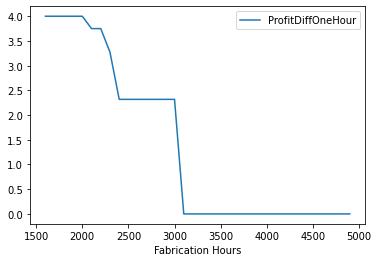

In [ ]:
# make a nice plot
tmp = myResults.drop(['Profit','Chairs','Desks','Tables'], axis=1)
tmp.plot(x='Fabrication Hours', y='ProfitDiffOneHour')
plt.show()